<a href="https://colab.research.google.com/github/Rigan567/Stock-Market-Prediction/blob/main/Stock%20Market%20Prediction%20(LSTM%20%26%20Linear%20Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM**

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/google_stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912
5,23-Jun-17,975.50,986.62,974.46,986.09,1563985
6,22-Jun-17,976.87,980.50,973.31,976.62,1009476
7,21-Jun-17,970.79,979.67,969.16,978.59,1161607
8,20-Jun-17,975.31,980.79,968.20,968.99,1297287
9,19-Jun-17,969.65,979.30,968.20,975.22,1468837


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912
5,23-Jun-17,975.50,986.62,974.46,986.09,1563985
6,22-Jun-17,976.87,980.50,973.31,976.62,1009476
7,21-Jun-17,970.79,979.67,969.16,978.59,1161607
8,20-Jun-17,975.31,980.79,968.20,968.99,1297287
9,19-Jun-17,969.65,979.30,968.20,975.22,1468837


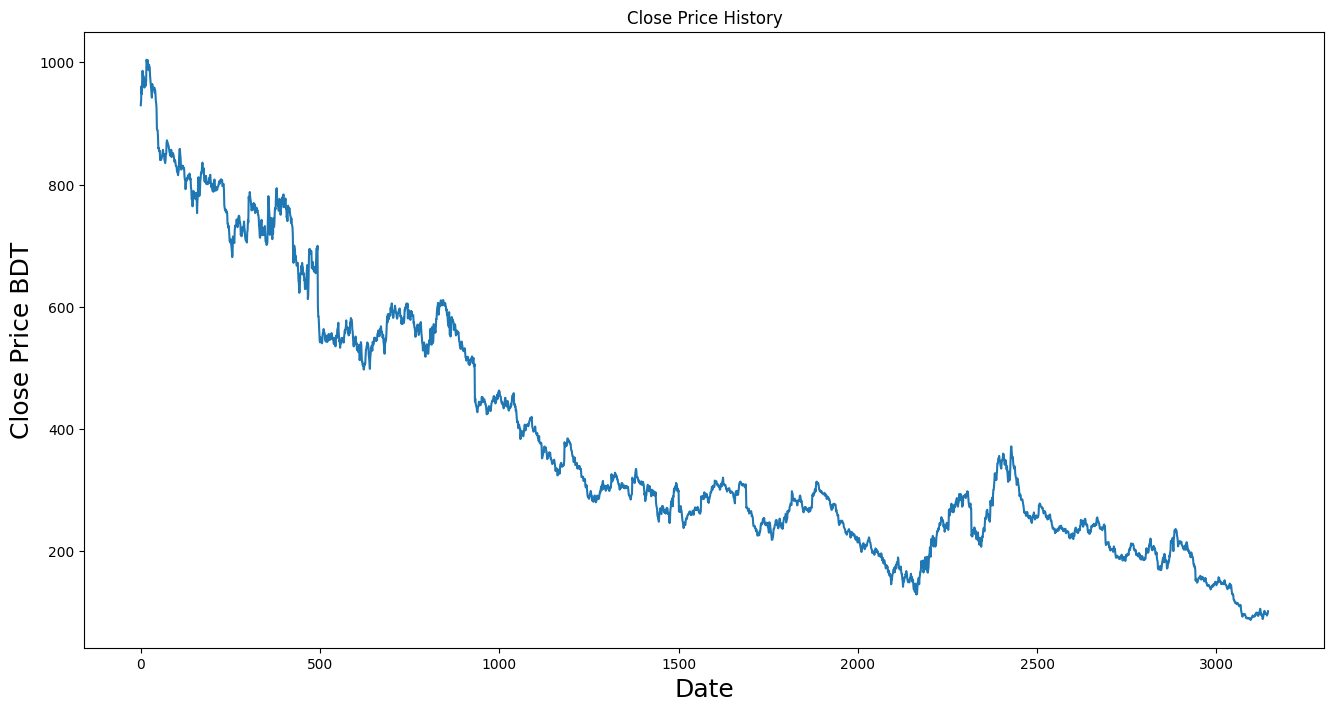

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
#ax=sns.lineplot(data=df, x='Date',y='close', color="blue");
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price BDT',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)

In [ ]:
dataset

array([[929.68],
       [937.82],
       [961.01],
       ...,
       [ 96.85],
       [ 97.35],
       [101.46]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:

from tensorflow import keras


model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='mean_squared_error',, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=1)

39/39 [==============================] - 57s 74ms/step - loss: 0.0011 - accuracy: 0.0000e+00


In [ ]:
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 1s 19ms/step


In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

8.798476508166994

<ipython-input-29-2e7dd5110ee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display['Predictions'] = predictions#Visualize the data


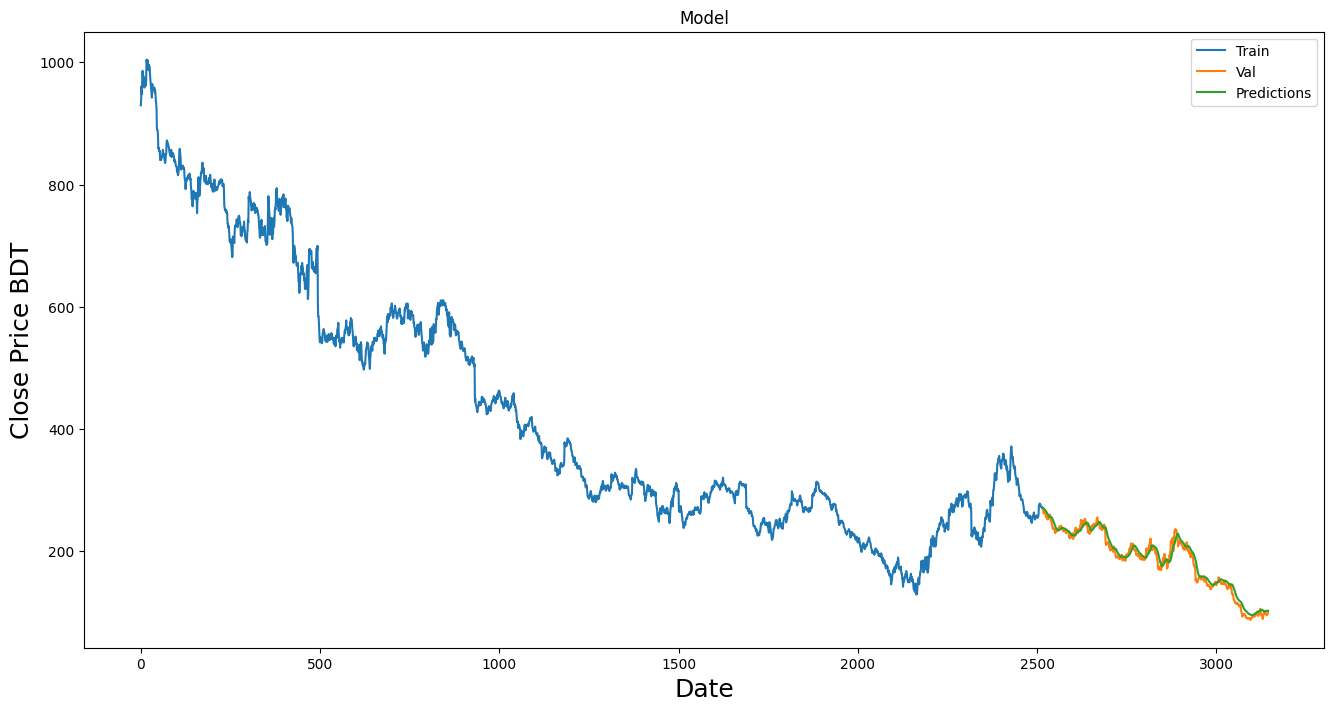

In [ ]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price BDT', fontsize=18)
plt.plot(train['Close'])
plt.plot(display['Close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

# Linear Regression

In [ ]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mglearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=bf5cfb4f7b9008e4e79d333753896f2ff0dc9df1d1567f48e1155e7d383cb634
  Stored in directory: /root/.cache/pip/wheels/11/33/5e/10b9333a84e80e0c099acf23ccc525e2607ecad167aa881be9
Successfully built mglearn


In [ ]:
df=pd.read_csv('/content/google_stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912
5,23-Jun-17,975.50,986.62,974.46,986.09,1563985
6,22-Jun-17,976.87,980.50,973.31,976.62,1009476
7,21-Jun-17,970.79,979.67,969.16,978.59,1161607
8,20-Jun-17,975.31,980.79,968.20,968.99,1297287
9,19-Jun-17,969.65,979.30,968.20,975.22,1468837


In [ ]:
df.shape

(3145, 6)

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df["Date"].unique()


array(['30-Jun-17', '29-Jun-17', '28-Jun-17', ..., '5-Jan-05', '4-Jan-05',
       '3-Jan-05'], dtype=object)

In [ ]:

levelencoder = LabelEncoder()


df["Date"] = levelencoder.fit_transform(df["Date"])


print(df[["Date"]].head())


   Date
0  2417
1  2224
2  2125
3  2022
4  1918


In [ ]:
df["High"].unique()


array([945.  , 951.66, 963.24, ...,  98.55, 101.57, 101.92])

In [ ]:

levelencoder = LabelEncoder()


df["High"] = levelencoder.fit_transform(df["High"])


print(df[["High"]].head())


   High
0  2926
1  2928
2  2941
3  2944
4  2956


In [ ]:
vc=df.corr()
vc

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.006133,0.004594,0.005582,0.005492,-0.027109
Open,0.006133,1.000000,0.938888,0.999824,0.999717,-0.481983
High,0.004594,0.938888,1.000000,0.939064,0.938841,-0.572718
Low,0.005582,0.999824,0.939064,1.000000,0.999886,-0.485890
Close,0.005492,0.999717,0.938841,0.999886,1.000000,-0.483139
Volume,-0.027109,-0.481983,-0.572718,-0.485890,-0.483139,1.000000


<Axes: >

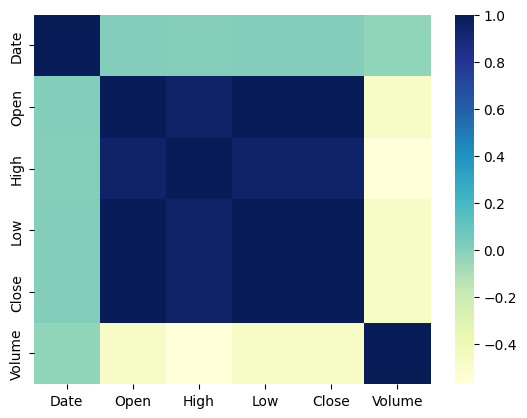

In [ ]:
import seaborn as sns
sns.heatmap(vc, cmap = 'YlGnBu')

Multiple linear regression

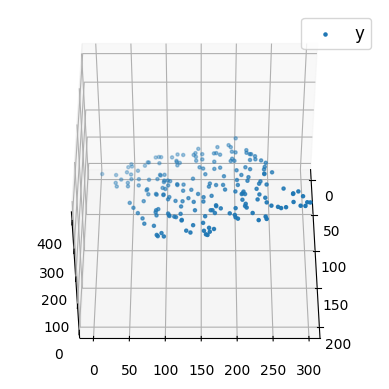

In [ ]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_dataset(n):
    x = []
    y = []
    random_x1 = np.random.rand()
    random_x2 = np.random.rand()
    for i in range(n):
        x1 = i
        x2 = i/2 + np.random.rand()*n
        x.append([1, x1, x2])
        y.append(random_x1 * x1 + random_x2 * x2 + 1)
    return np.array(x), np.array(y)

x, y = generate_dataset(200)

mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)

plt.show()